# Onchocerciasis model outputs

By now you should have run the onchocerciasis model with linear parasite-induced vector mortality (PIVM) and filled in the .csv file provided. Here you will fill in some code to plot the results.

First, run this cell to load your data. Have a look at the file to check it looks like you were expecting.

In [18]:
dat <- read.csv("../../IDM3/Graphics and Data/SOLUTION_oncho_main_outputs.csv",
                 stringsAsFactors = F)

dat

Village,No,ABR,ATP,P_obs,P_pred,M_obs,M_pred,L_obs,L_pred,ATP_pred,Country
Tcholliré,1,1000,17,49.5,50.5,9.6,10.1,0.017,0.025,25,Cameroon
R.Manga,2,2200,49,51.9,70.8,10.2,25.3,0.016,0.054,119,Cameroon
Nonozé,3,2400,77,NA,71.8,33.6,26.6,0.032,0.056,134,Cameroon
Douffing,4,2500,55,62.2,72.3,21.0,27.2,0.022,0.057,143,Cameroon
Nasso,5,2620,222,54.8,72.8,28.0,27.9,0.085,0.058,152,B.F./C.d'I.
Touboro,6,8960,922,71.0,81.5,56.4,42.8,0.103,0.079,708,Cameroon
Péndié,7,9674,959,70.3,81.9,41.5,43.9,0.099,0.080,774,B.F./C.d'I.
Larki,8,10700,79,65.9,82.5,14.4,45.3,0.007,0.082,877,Cameroon
Gandi-2,9,14152,474,71.8,84.2,39.0,50.0,0.033,0.087,1231,Cameroon
Bonandiga,10,16850,1673,85.2,85.4,64.2,53.7,0.099,0.091,1533,Cameroon


Now, start plotting! 

Plot:  
* $P_{obs}$ and $P_{pred}$ (linear PIVM) vs ABR  
* $M_{obs}$ and $M_{pred}$ (linear PIVM) vs ABR  

What is the shape of these relationships?  
 

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”

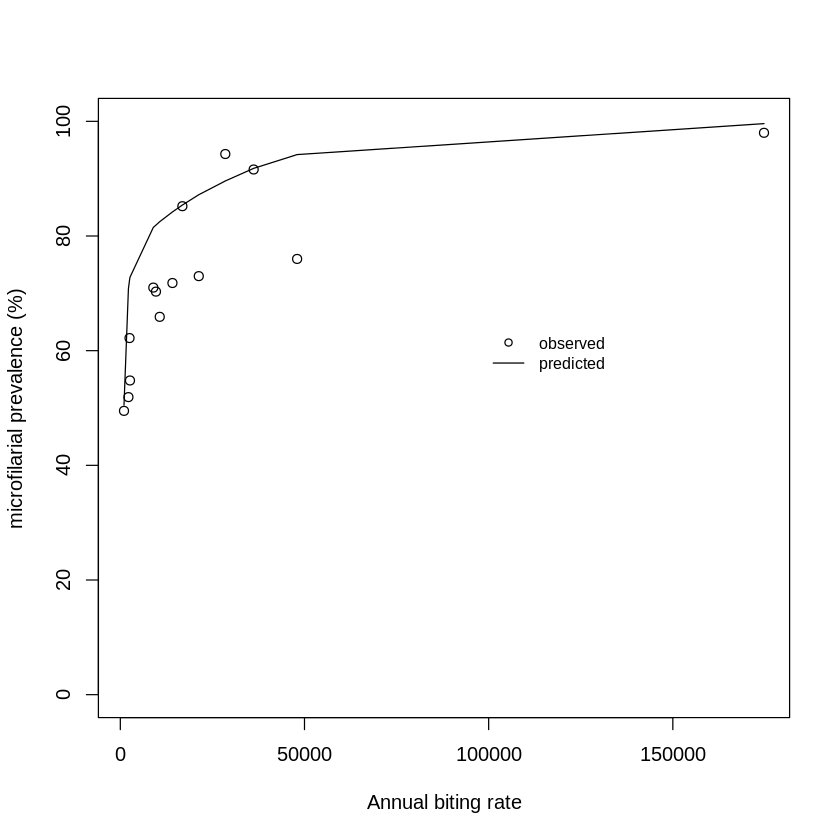

In [10]:
#plot mf prevalence against ABR

#par(mfrow = c(2,2)) #for a panel
par(mfrow = c(1,1)) #for single plots

plot(dat$ABR, dat$P_obs, ylim = c(0, 100), xlab = 'Annual biting rate', ylab = 'microfilarial prevalence (%)')
lines(dat$ABR, dat$P_pred)

legend(100000, 65, legend=c("observed", "predicted"),
  lty=c(0, 1), pch = c(1, NA),  cex=0.8, bty = "n")


Now plot:  
* $M_{obs}$ vs $M_{pred}$  
  
Fit a trendline to this plot, set intercept to zero, and include the equation and coefficient of determination (R2) in the plot.
Is the model over- or underestimating microfilarial prevalence and intensity?


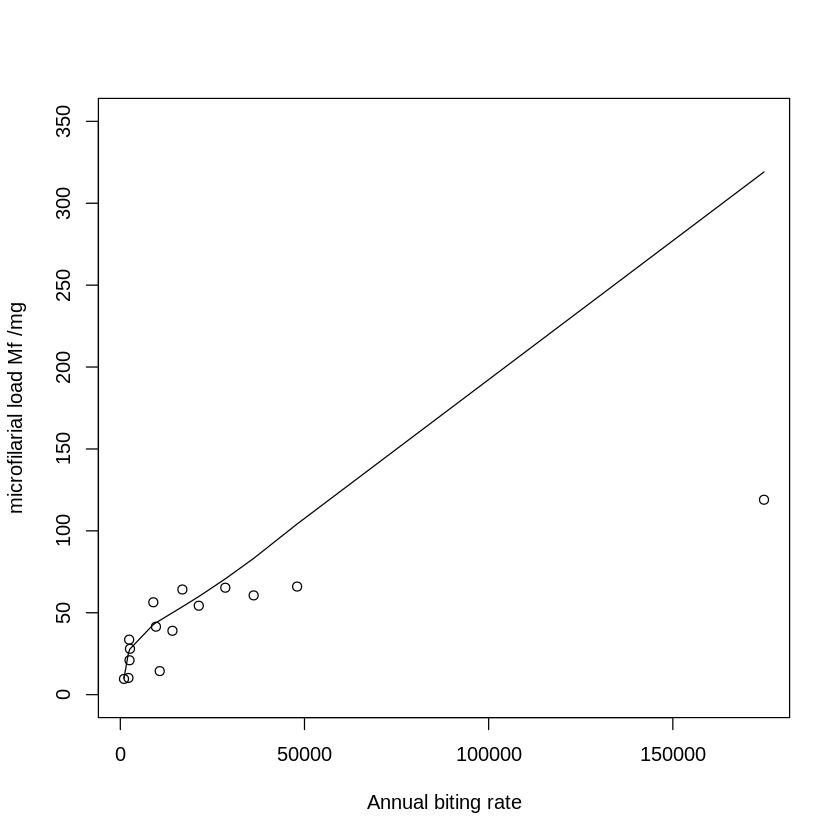

In [11]:
#plot mf intensity against ABR

plot(dat$ABR, dat$M_obs, ylim = c(0, 350), xlab = 'Annual biting rate', ylab = 'microfilarial load Mf /mg')
lines(dat$ABR, dat$M_pred)

Finally, plot  
  
* $L_{obs}$ vs $L_{pred}$ (linear PIVM) vs ABR  

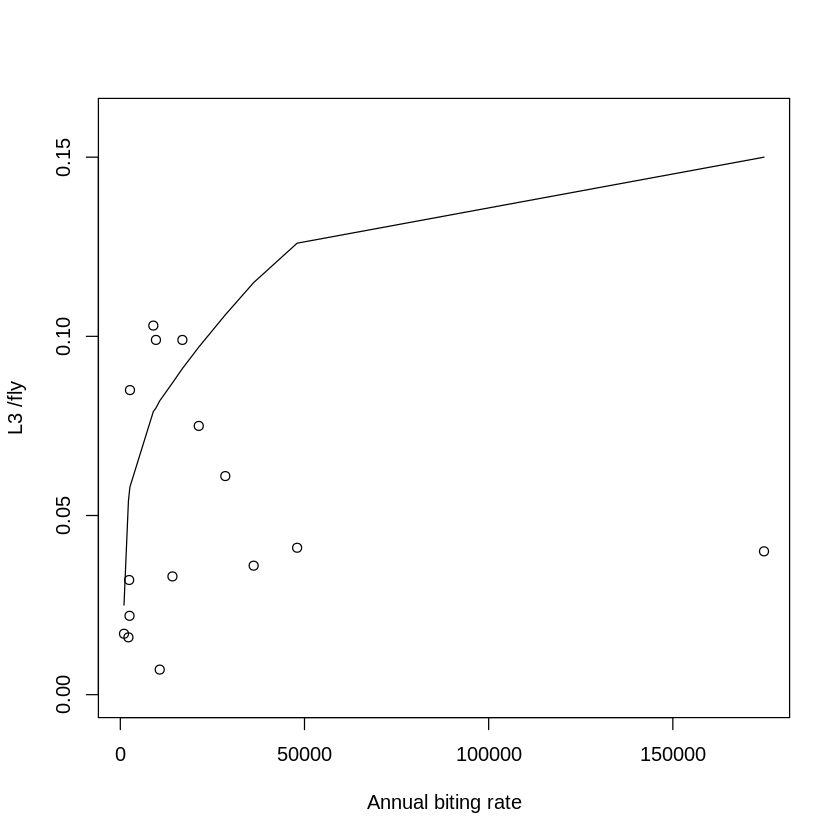

In [12]:
#plot L3 against ABR

plot(dat$ABR, dat$L_obs, ylim = c(0, 0.16), xlab = 'Annual biting rate', ylab = 'L3 /fly')
lines(dat$ABR, dat$L_pred)

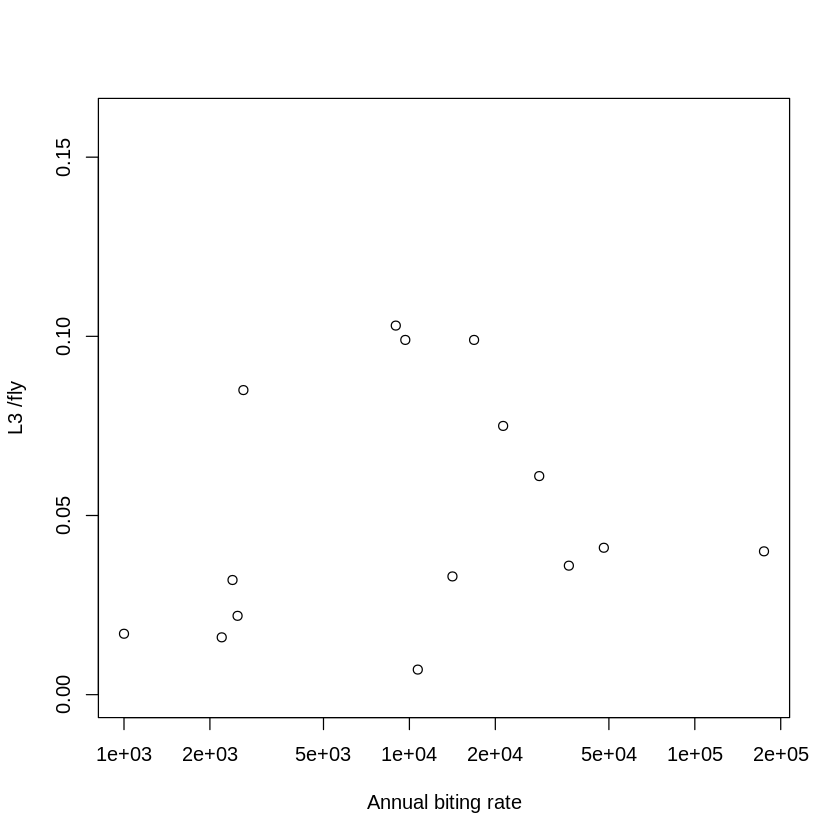

In [9]:
# and try on a log scale
plot(dat$ABR, dat$L_obs, ylim = c(0, 0.16), xlab = 'Annual biting rate', ylab = 'L3 /fly', log = 'x')
lines(dat$ABR, dat$L_pred)


### What do you conclude?

In [19]:
dat$P_obs

[1] 49.5 51.9   NA 62.2 54.8 71.0 70.3 65.9 71.8 85.2 73.0 94.3 91.6 76.0 98.0

[1] 0.9884215

dat$P_pred 
  0.891341

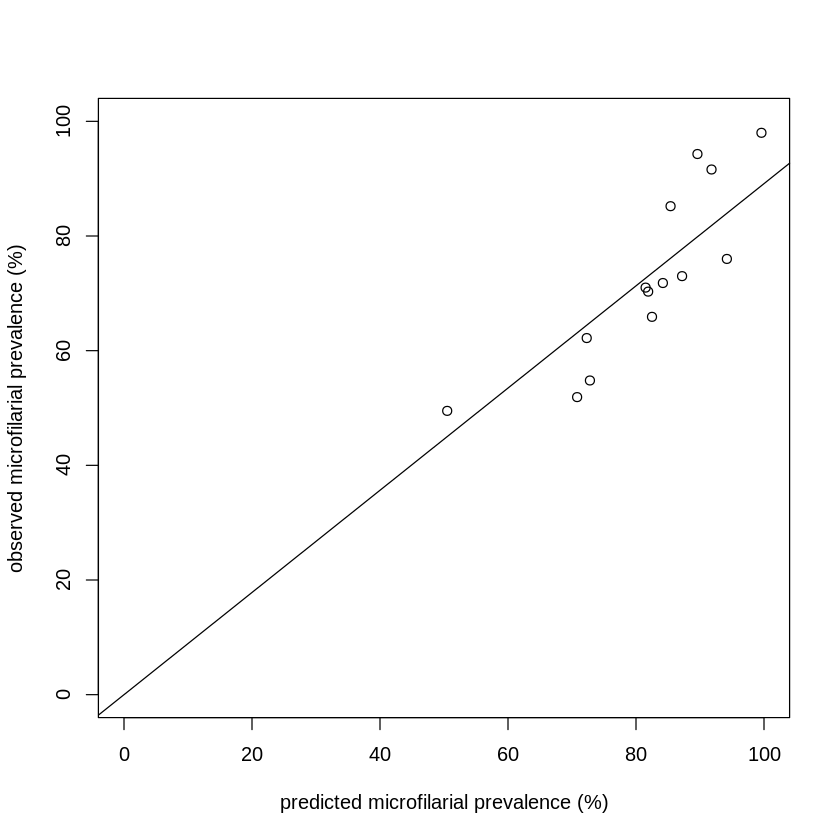

[1] 0.8210125

M_pred 
0.4962849

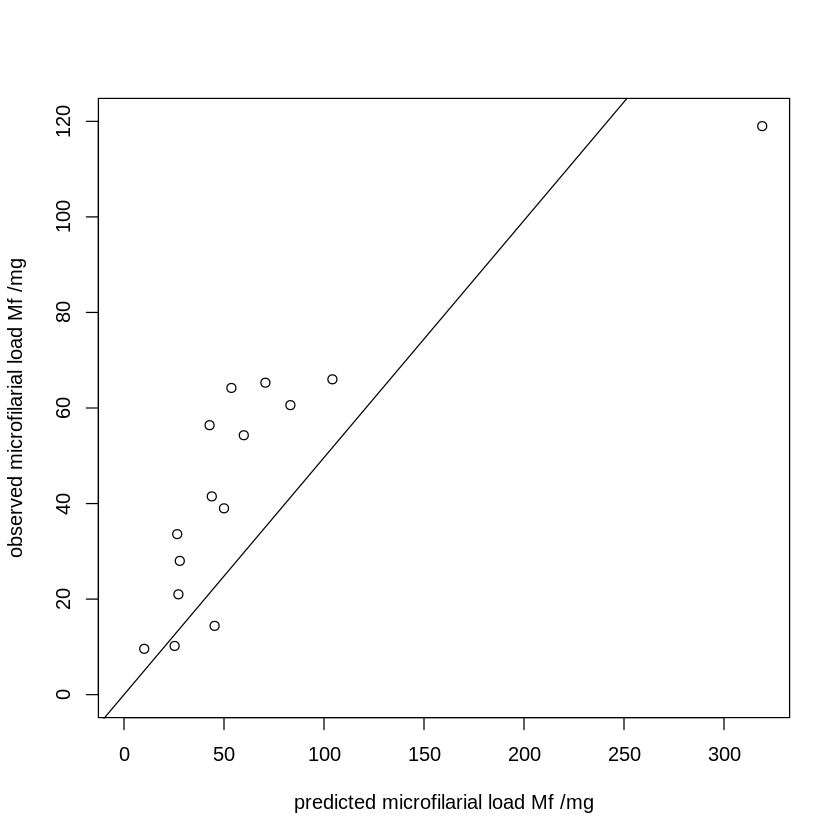

[1] 0.6779013

M_pred 
0.4962849

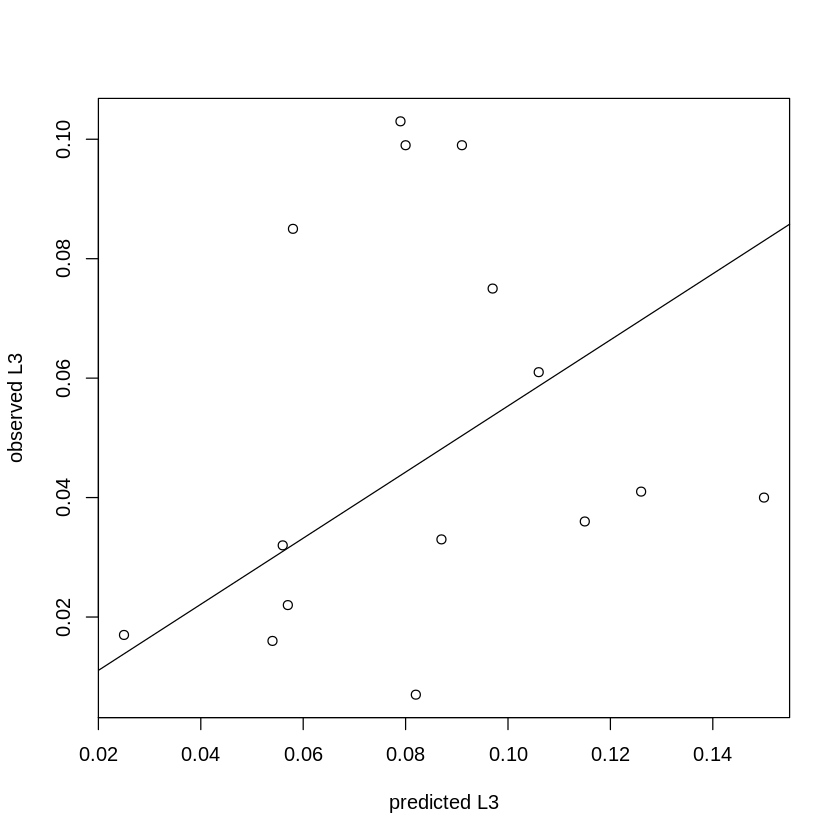

In [20]:
#fit linear model to observed vs predicted, set intercept to 0

prevalence_lm <- lm(dat$P_obs ~ 0 + dat$P_pred) 
intensity_lm <- lm(M_obs ~ 0 + M_pred, data = dat) 
L3_lm <- lm(L_obs ~ 0 + L_pred, data = dat)  

#plot linear models with observed and predicted 
plot(dat$P_pred, dat$P_obs, ylim = c(0, 100), xlim = c(0, 100), ylab = 'observed microfilarial prevalence (%)', xlab = 'predicted microfilarial prevalence (%)')
abline(prevalence_lm)

summary(prevalence_lm)$r.squared
prevalence_lm$coefficients[1]
                
plot(dat$M_pred, dat$M_obs, ylim = c(0, 120), xlim = c(0, 320), ylab = 'observed microfilarial load Mf /mg', xlab = 'predicted microfilarial load Mf /mg')
abline(intensity_lm)

summary(intensity_lm)$r.squared
intensity_lm$coefficients[1]

plot(dat$L_pred, dat$L_obs,  ylab = 'observed L3', xlab = 'predicted L3')
abline(L3_lm)

summary(L3_lm)$r.squared
intensity_lm$coefficients[1]